# Laptop Price Analysis
***
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')

## Reading Dataset

In [2]:
df=pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


## Data Types

In [4]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

## Data Cleaning
### Checking for Null Values

In [5]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.isnull().values.any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## Exploratory Data Analysis

In [9]:
df.shape

(1275, 23)

In [10]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [11]:
df.describe(include = object)

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


In [12]:
#Extracting numeric column names from the dataset
numeric_column=df.select_dtypes(include=np.number).columns.tolist()
numeric_column

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

### Heatmap

<Axes: >

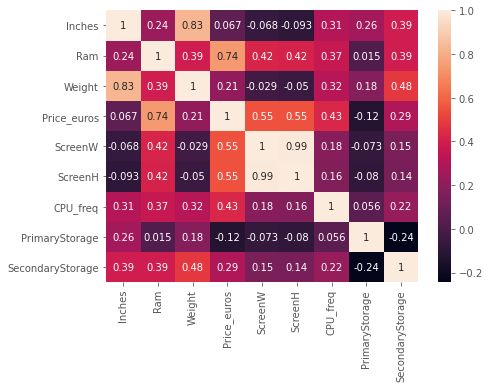

In [13]:
corrmat = df[numeric_column].corr()
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(corrmat, vmax=1, annot=True)

### Scatterplot

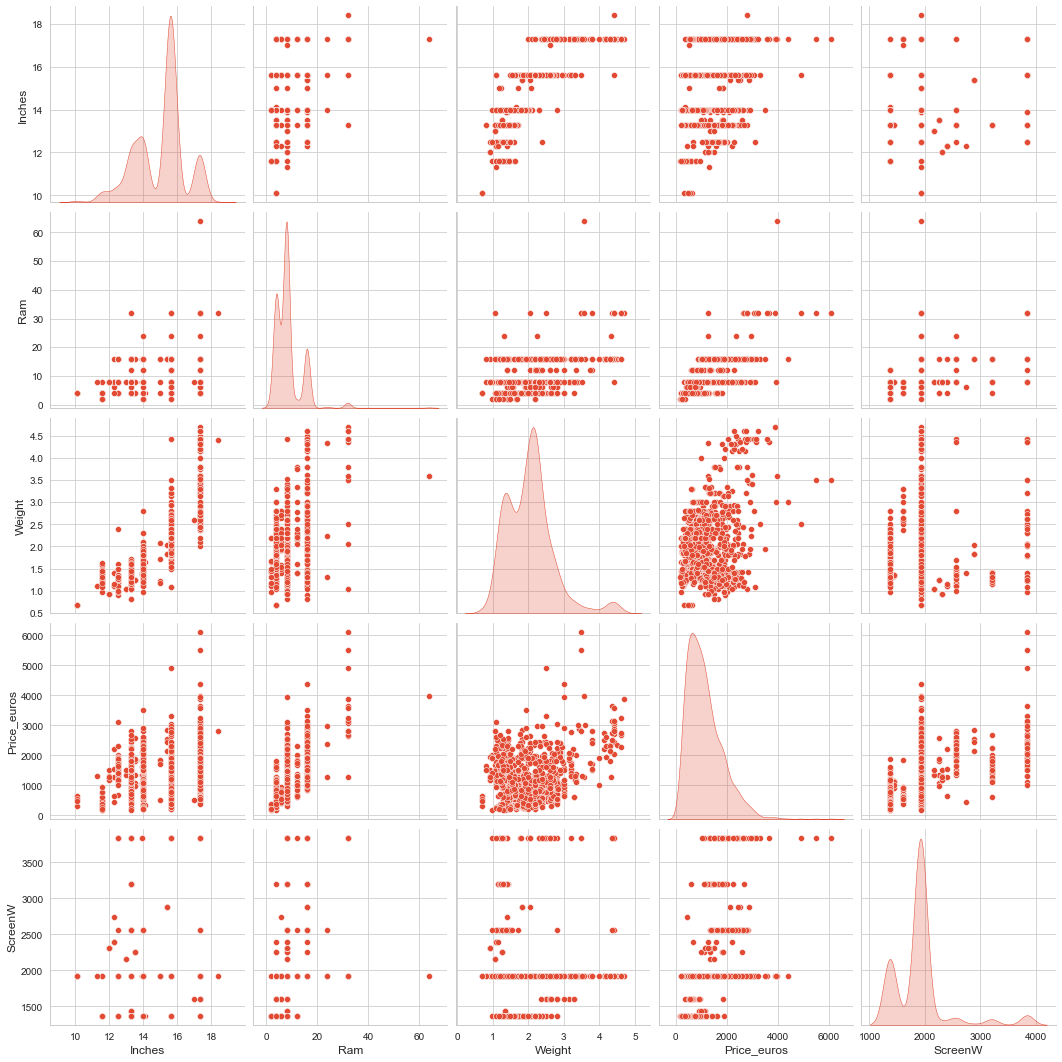

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df[numeric_column[:5]], height=3, kind="scatter", diag_kind="kde")

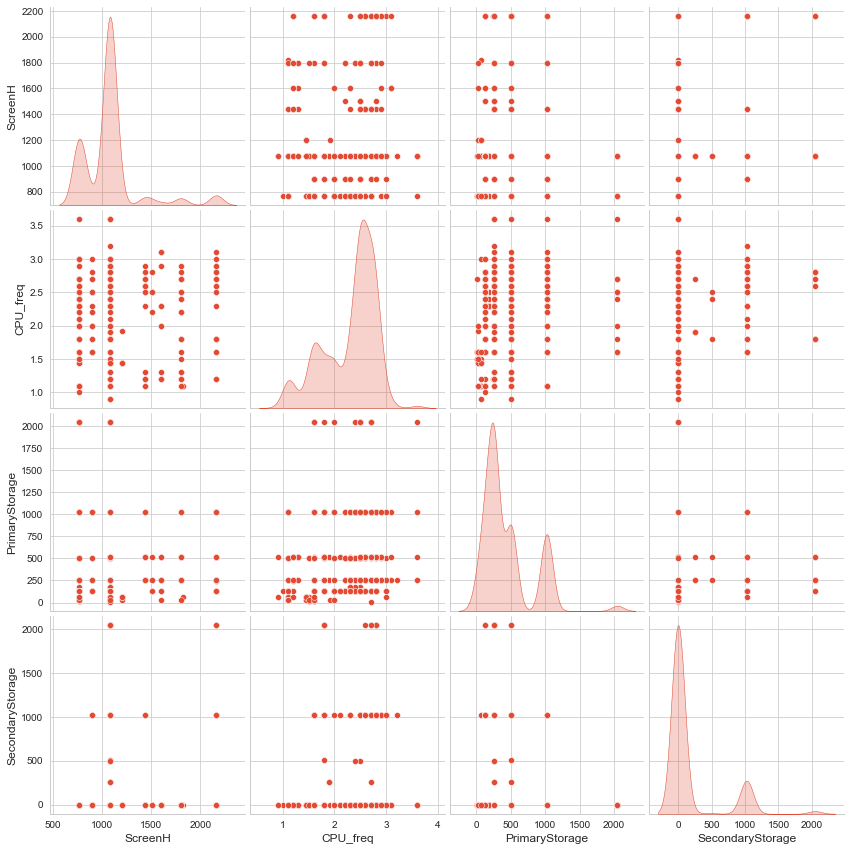

In [15]:
sns.pairplot(df[numeric_column[5:]], height=3, kind="scatter", diag_kind="kde")

### Displot

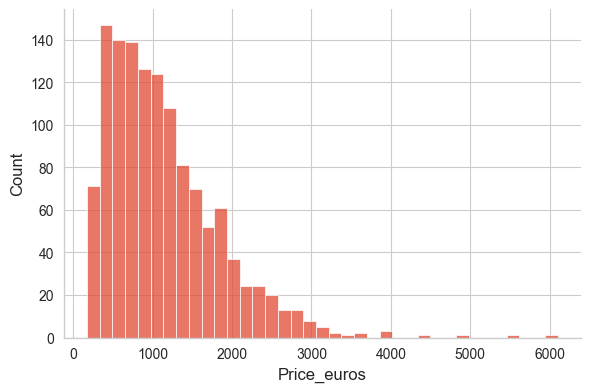

In [16]:
sns.displot(df['Price_euros'], height=4, aspect=1.5).fig.set_dpi(100)

### Histograms

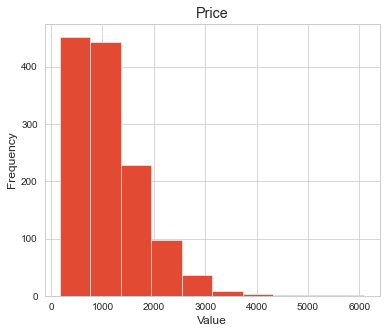

In [17]:
# Distribution of numerical columns
plt.figure(figsize=(12,8))
df['Price_euros'].hist(figsize=(6, 5)).set(title='Price')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

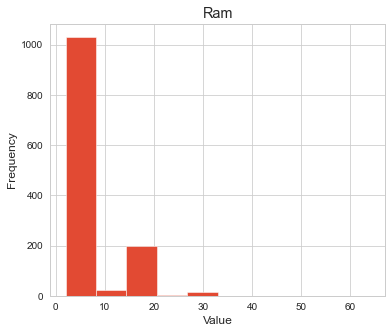

In [18]:
plt.figure(figsize=(12,8))
df['Ram'].hist(figsize=(6, 5)).set(title='Ram')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

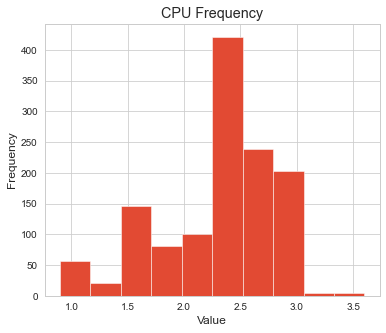

In [19]:
plt.figure(figsize=(12,8))
df['CPU_freq'].hist(figsize=(6, 5)).set(title='CPU Frequency')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Countplot

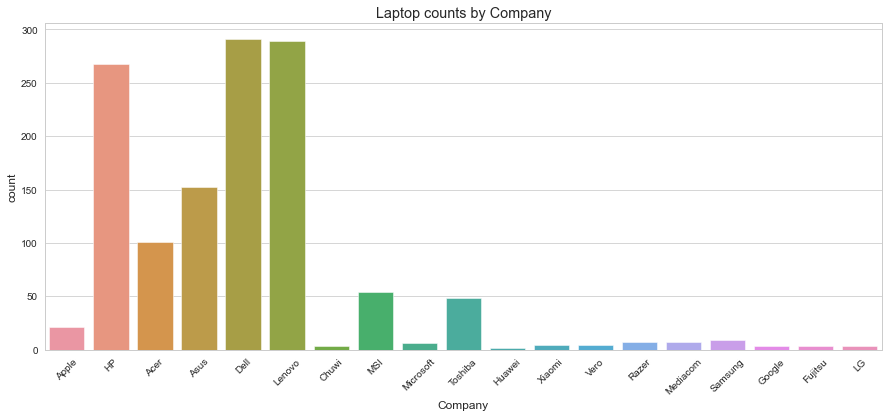

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Company').set(title='Laptop counts by Company')
plt.xticks(rotation=45)
plt.show()

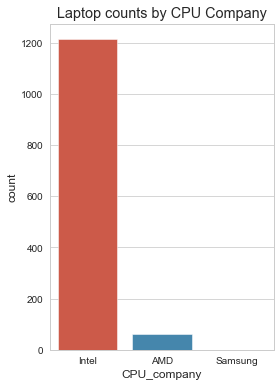

In [21]:
plt.figure(figsize=(4, 6))
sns.countplot(data=df, x='CPU_company').set(title='Laptop counts by CPU Company')
plt.show()

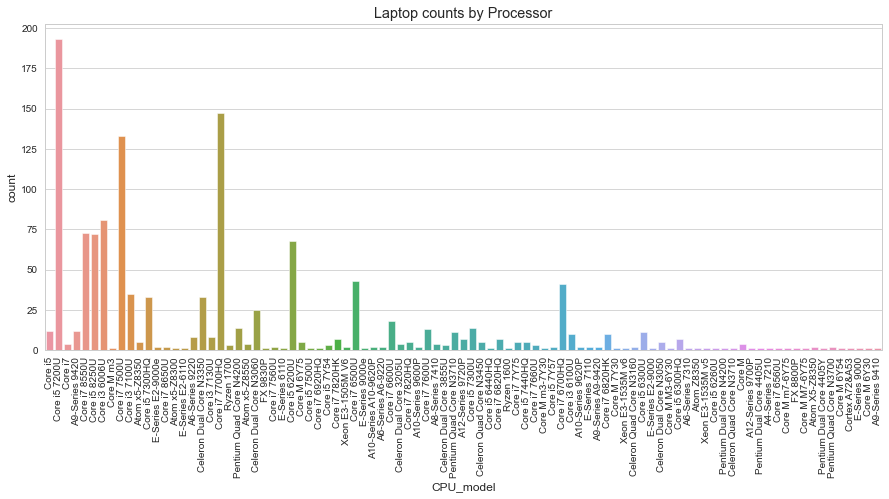

In [22]:
plt.figure(figsize=(15, 6))
my_plot = sns.countplot(data=df, x='CPU_model').set(title='Laptop counts by Processor')
plt.xticks(rotation=90)
plt.show()

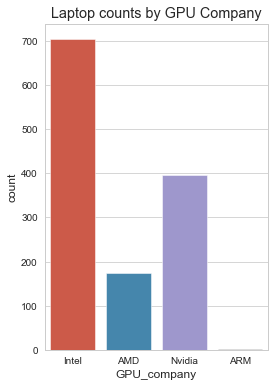

In [23]:
plt.figure(figsize=(4, 6))
my_plot = sns.countplot(data=df, x='GPU_company').set(title='Laptop counts by GPU Company')
plt.show()

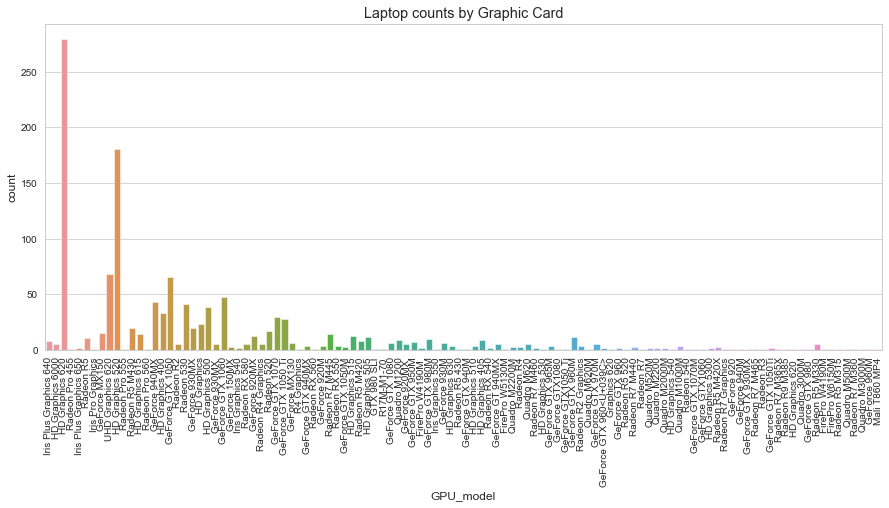

In [24]:
plt.figure(figsize=(15, 6))
my_plot = sns.countplot(data=df, x='GPU_model').set(title='Laptop counts by Graphic Card')
plt.xticks(rotation=90)
plt.show()

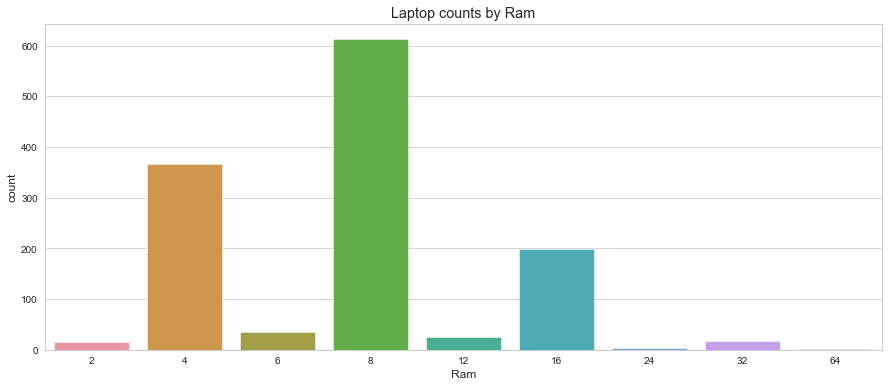

In [25]:
plt.figure(figsize=(15, 6))
my_plot = sns.countplot(data=df, x='Ram').set(title='Laptop counts by Ram')
plt.show()

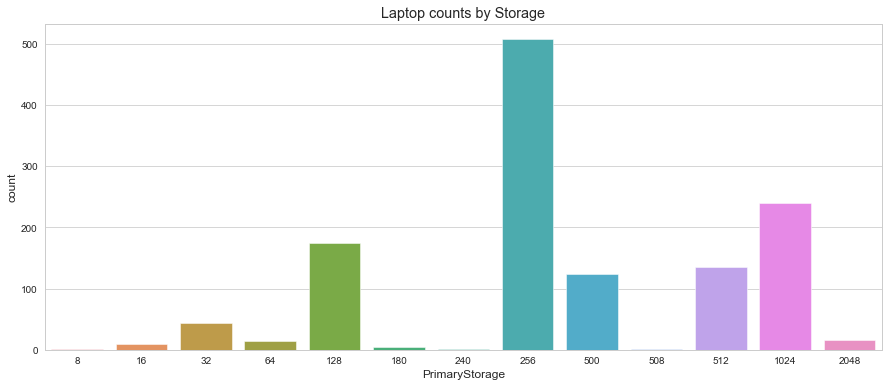

In [26]:
plt.figure(figsize=(15, 6))
my_plot = sns.countplot(data=df, x='PrimaryStorage').set(title='Laptop counts by Storage')
plt.show()

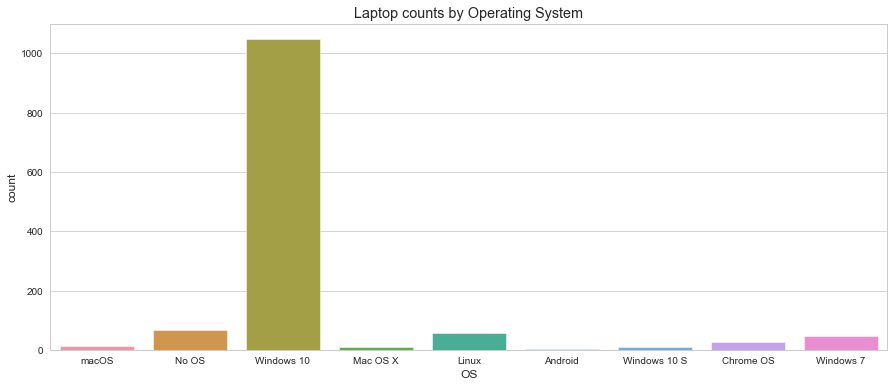

In [27]:
plt.figure(figsize=(15, 6))
my_plot = sns.countplot(data=df, x='OS').set(title='Laptop counts by Operating System')
plt.show()

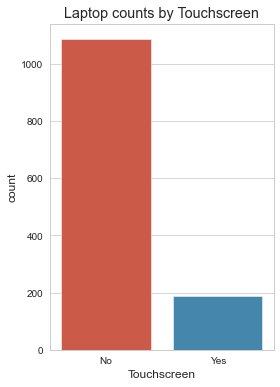

In [28]:
plt.figure(figsize=(4, 6))
my_plot = sns.countplot(data=df, x='Touchscreen').set(title='Laptop counts by Touchscreen')
plt.show()

### BoxPlot

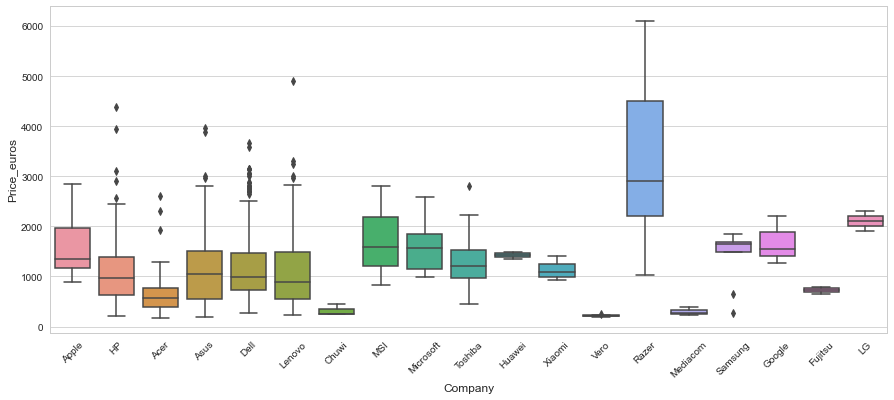

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Company', y='Price_euros')
plt.xticks(rotation=45)
plt.show()

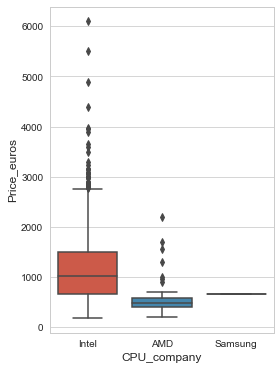

In [30]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df, x='CPU_company', y='Price_euros')
plt.show()

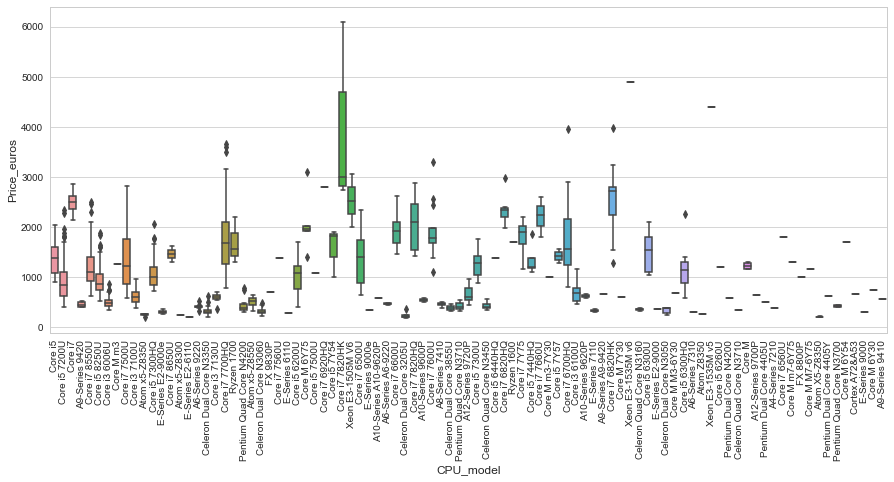

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='CPU_model', y='Price_euros')
plt.xticks(rotation=90)
plt.show()

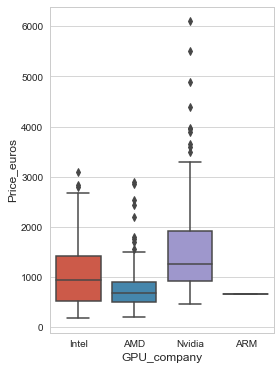

In [32]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df, x='GPU_company', y='Price_euros')
plt.show()

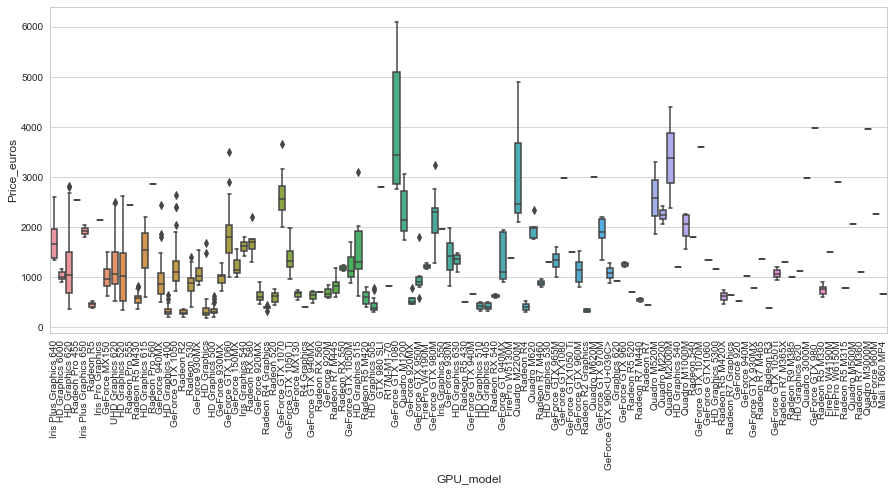

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='GPU_model', y='Price_euros')
plt.xticks(rotation=90)
plt.show()

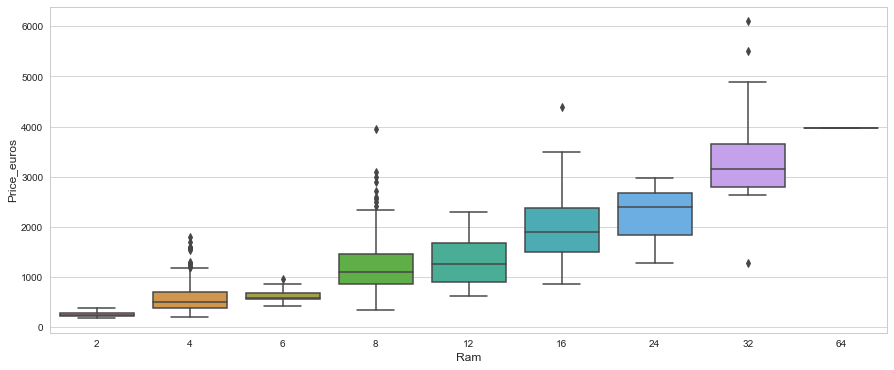

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Ram', y='Price_euros')
plt.show()

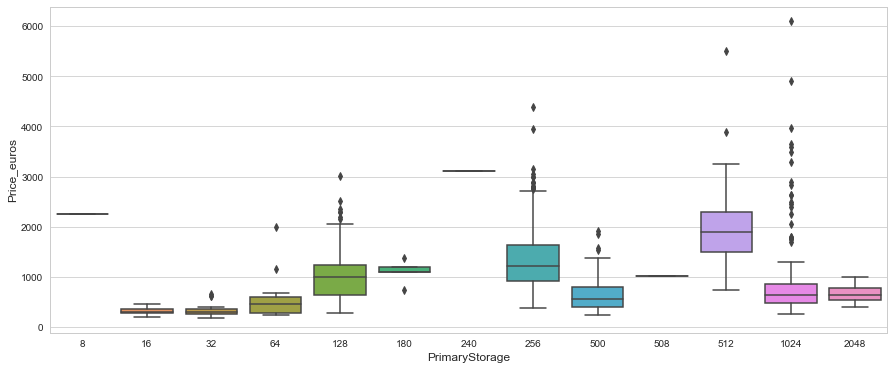

In [35]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='PrimaryStorage', y='Price_euros')
plt.show()

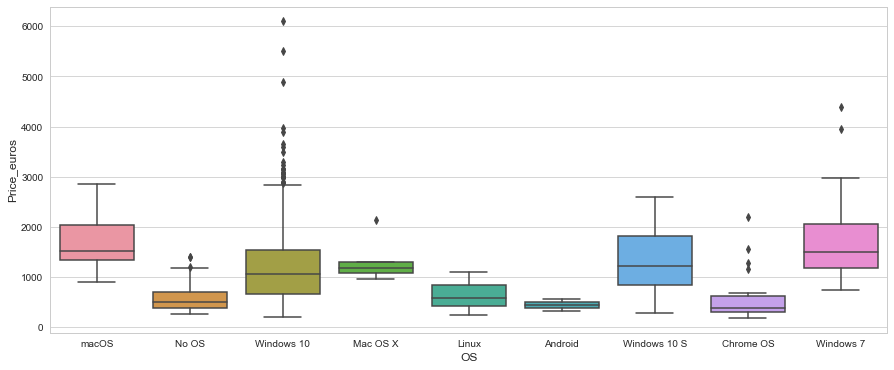

In [36]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='OS', y='Price_euros')
plt.show()

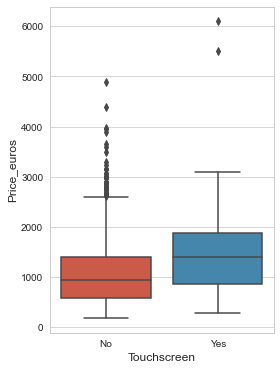

In [37]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df, x='Touchscreen', y='Price_euros')
plt.show()

### Feature Selection and Model Selection

In [38]:
# Identify categorical variables by selecting columns with data type 'object'
categorical_variables = df.columns[df.dtypes == 'object']
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,True,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,True,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,True,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [40]:
X.head()

,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,Company_Asus,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,2560,1600,2.3,128,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,1440,900,1.8,128,0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,1920,1080,2.5,256,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2880,1800,2.7,512,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,2560,1600,3.1,256,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1270    6.458338
1271    7.312553
1272    5.433722
1273    6.638568
1274    5.910797
Name: Price_euros, Length: 1275, dtype: float64

In [42]:
#Train test splitting to split trai data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

- Training Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression()

In [44]:
#Predictions on Test data
predictions = lm.predict(X_test)

- scatterplot for the real test values and the predicted values

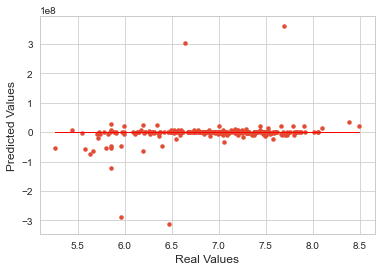

In [45]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)
plt.show()

- R-squared (R2) score

In [46]:
lm.score(X_train, y_train)

0.9884493238933919

In [47]:
lm.score(X_test, y_test)

-4833144449994326.0